In [193]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline

In [194]:
df = pd.read_csv('loan_data_set.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [195]:
df.shape

(614, 13)

In [196]:
df['Loan_Status'].value_counts()
df['Property_Area'].value_counts()
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>]], dtype=object)

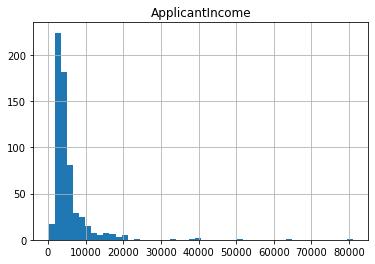

In [197]:
df.hist(column='ApplicantIncome', bins=50)

In [198]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [199]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [200]:
pdf = df.dropna()
pdf.shape

(480, 13)

In [201]:
pdf.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [202]:
X = pdf[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']] .values  #.astype(float)
X[0:5]

array([['Male', 'Yes', '1', 'Graduate', 'No', 4583, 1508.0, 128.0, 360.0,
        1.0, 'Rural'],
       ['Male', 'Yes', '0', 'Graduate', 'Yes', 3000, 0.0, 66.0, 360.0,
        1.0, 'Urban'],
       ['Male', 'Yes', '0', 'Not Graduate', 'No', 2583, 2358.0, 120.0,
        360.0, 1.0, 'Urban'],
       ['Male', 'No', '0', 'Graduate', 'No', 6000, 0.0, 141.0, 360.0,
        1.0, 'Urban'],
       ['Male', 'Yes', '2', 'Graduate', 'Yes', 5417, 4196.0, 267.0,
        360.0, 1.0, 'Urban']], dtype=object)

In [203]:
from sklearn import preprocessing
le_Gender = preprocessing.LabelEncoder()
le_Gender.fit(['Male','Female'])
X[:,0] = le_Gender.transform(X[:,0]) 

le_Married = preprocessing.LabelEncoder()
le_Married.fit([ 'Yes', 'No'])
X[:,1] = le_Married.transform(X[:,1])

le_Dependents = preprocessing.LabelEncoder()
le_Dependents.fit(['3+', '2', '1', '0'])
X[:,2] = le_Dependents.transform(X[:,2]) 

le_Education = preprocessing.LabelEncoder()
le_Education.fit([ 'Graduate', 'Not Graduate'])
X[:,3] = le_Education.transform(X[:,3]) 

le_Self_Employed = preprocessing.LabelEncoder()
le_Self_Employed.fit([ 'Yes', 'No'])
X[:,4] = le_Self_Employed.transform(X[:,4]) 

le_Property_Area = preprocessing.LabelEncoder()
le_Property_Area.fit([ 'Urban', 'Semiurban', 'Rural'])
X[:,10] = le_Property_Area.transform(X[:,10]) 

X[0:5]

array([[1, 1, 1, 0, 0, 4583, 1508.0, 128.0, 360.0, 1.0, 0],
       [1, 1, 0, 0, 1, 3000, 0.0, 66.0, 360.0, 1.0, 2],
       [1, 1, 0, 1, 0, 2583, 2358.0, 120.0, 360.0, 1.0, 2],
       [1, 0, 0, 0, 0, 6000, 0.0, 141.0, 360.0, 1.0, 2],
       [1, 1, 2, 0, 1, 5417, 4196.0, 267.0, 360.0, 1.0, 2]], dtype=object)

In [204]:
y = pdf['Loan_Status'].values
y[0:5]

array(['N', 'Y', 'Y', 'Y', 'Y'], dtype=object)

# Building model using KNN, finding the best k and accuracy evaluation (7 marks)



In [205]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.47,  0.74,  0.22, -0.5 , -0.4 , -0.14, -0.03, -0.21,  0.28,
         0.41, -1.32],
       [ 0.47,  0.74, -0.76, -0.5 ,  2.5 , -0.42, -0.6 , -0.98,  0.28,
         0.41,  1.26],
       [ 0.47,  0.74, -0.76,  1.99, -0.4 , -0.49,  0.3 , -0.31,  0.28,
         0.41,  1.26],
       [ 0.47, -1.36, -0.76, -0.5 , -0.4 ,  0.11, -0.6 , -0.05,  0.28,
         0.41,  1.26],
       [ 0.47,  0.74,  1.2 , -0.5 ,  2.5 ,  0.01,  1.  ,  1.52,  0.28,
         0.41,  1.26]])

In [206]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (384, 11) (384,)
Test set: (96, 11) (96,)


In [207]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 12
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.64, 0.58, 0.7 , 0.71, 0.74, 0.72, 0.76, 0.75, 0.76, 0.75, 0.76])

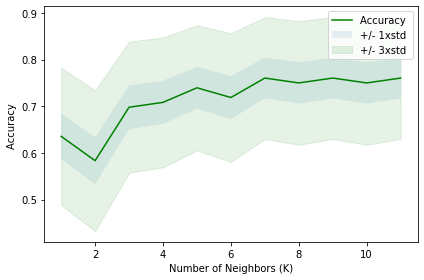

In [208]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [209]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7604166666666666 with k= 7


In [210]:
k = 7
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh
yhat = neigh.predict(X_test)
yhat[0:5]
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8307291666666666
Test set Accuracy:  0.7604166666666666


# Building model using Decision Tree and find the accuracy evaluation (6 marks)

In [211]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [212]:
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (336, 11) &  Size of Y training set (336,)


In [213]:
print('Shape of X test set {}'.format(X_testset.shape),'&',' Size of Y test set {}'.format(y_testset.shape))

Shape of X test set (144, 11) &  Size of Y test set (144,)


In [214]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
LoanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
LoanTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [215]:
LoanTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [216]:
predTree = LoanTree.predict(X_testset)
print (predTree [0:5])
print (y_testset [0:5])

['Y' 'Y' 'Y' 'Y' 'Y']
['Y' 'N' 'Y' 'Y' 'N']


In [217]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.7430555555555556


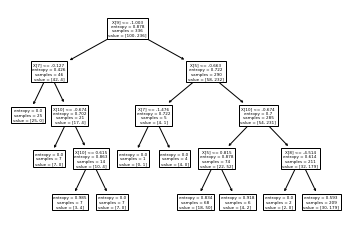

In [218]:
tree.plot_tree(LoanTree)
plt.show()

# Building model using SVM and find the accuracy evaluation (6 marks)

In [219]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (384, 11) (384,)
Test set: (96, 11) (96,)


In [220]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [221]:
yhat = clf.predict(X_test)
yhat [0:5]

array(['Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [222]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [223]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           N       0.82      0.40      0.54        35
           Y       0.73      0.95      0.83        61

    accuracy                           0.75        96
   macro avg       0.78      0.68      0.68        96
weighted avg       0.77      0.75      0.72        96

Confusion matrix, without normalization
[[58  3]
 [21 14]]


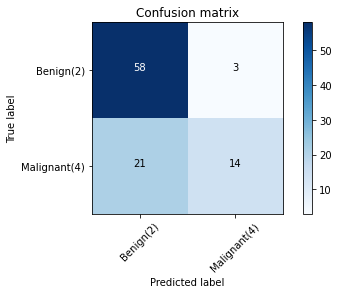

In [224]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=['Y','N'])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [225]:
#You can also easily use the f1_score from sklearn library:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.7228021978021978

In [226]:
#Let's try the jaccard index for accuracy:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label="Y")

0.7073170731707317

In [227]:
clf1 = svm.SVC(kernel='linear')
clf1.fit(X_train, y_train) 
yhat1 = clf1.predict(X_test)
yhat1 [0:5]

print("Avg F1-score: %.4f" % f1_score(y_test, yhat1, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat1,pos_label='Y'))

Avg F1-score: 0.7176
Jaccard score: 0.7108


# Building model using Logistic Regression and find the accuracy evaluation (6 marks)


In [228]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [229]:
yhat = LR.predict(X_test)
yhat

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [230]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.42, 0.58],
       [0.37, 0.63],
       [0.33, 0.67],
       [0.29, 0.71],
       [0.31, 0.69],
       [0.38, 0.62],
       [0.34, 0.66],
       [0.68, 0.32],
       [0.4 , 0.6 ],
       [0.33, 0.67],
       [0.73, 0.27],
       [0.39, 0.61],
       [0.36, 0.64],
       [0.43, 0.57],
       [0.32, 0.68],
       [0.35, 0.65],
       [0.33, 0.67],
       [0.35, 0.65],
       [0.35, 0.65],
       [0.36, 0.64],
       [0.72, 0.28],
       [0.32, 0.68],
       [0.49, 0.51],
       [0.42, 0.58],
       [0.67, 0.33],
       [0.64, 0.36],
       [0.68, 0.32],
       [0.41, 0.59],
       [0.38, 0.62],
       [0.35, 0.65],
       [0.39, 0.61],
       [0.31, 0.69],
       [0.73, 0.27],
       [0.34, 0.66],
       [0.71, 0.29],
       [0.71, 0.29],
       [0.34, 0.66],
       [0.32, 0.68],
       [0.4 , 0.6 ],
       [0.33, 0.67],
       [0.35, 0.65],
       [0.36, 0.64],
       [0.39, 0.61],
       [0.38, 0.62],
       [0.42, 0.58],
       [0.31, 0.69],
       [0.34, 0.66],
       [0.36,

In [231]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label="Y")

0.7108433734939759

In [232]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=['Y','N']))

[[59  2]
 [22 13]]


Confusion matrix, without normalization
[[59  2]
 [22 13]]


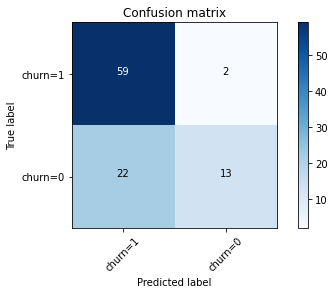

In [233]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=['Y','N'])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [234]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           N       0.87      0.37      0.52        35
           Y       0.73      0.97      0.83        61

    accuracy                           0.75        96
   macro avg       0.80      0.67      0.68        96
weighted avg       0.78      0.75      0.72        96



## Log loss

In [235]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.574733457479031